# Getting started - how to pass images into Claude

The Claude 3 model family supports image inputs in the API. Here’s how you can pass images to Claude:

In [ ]:
%pip install anthropic IPython

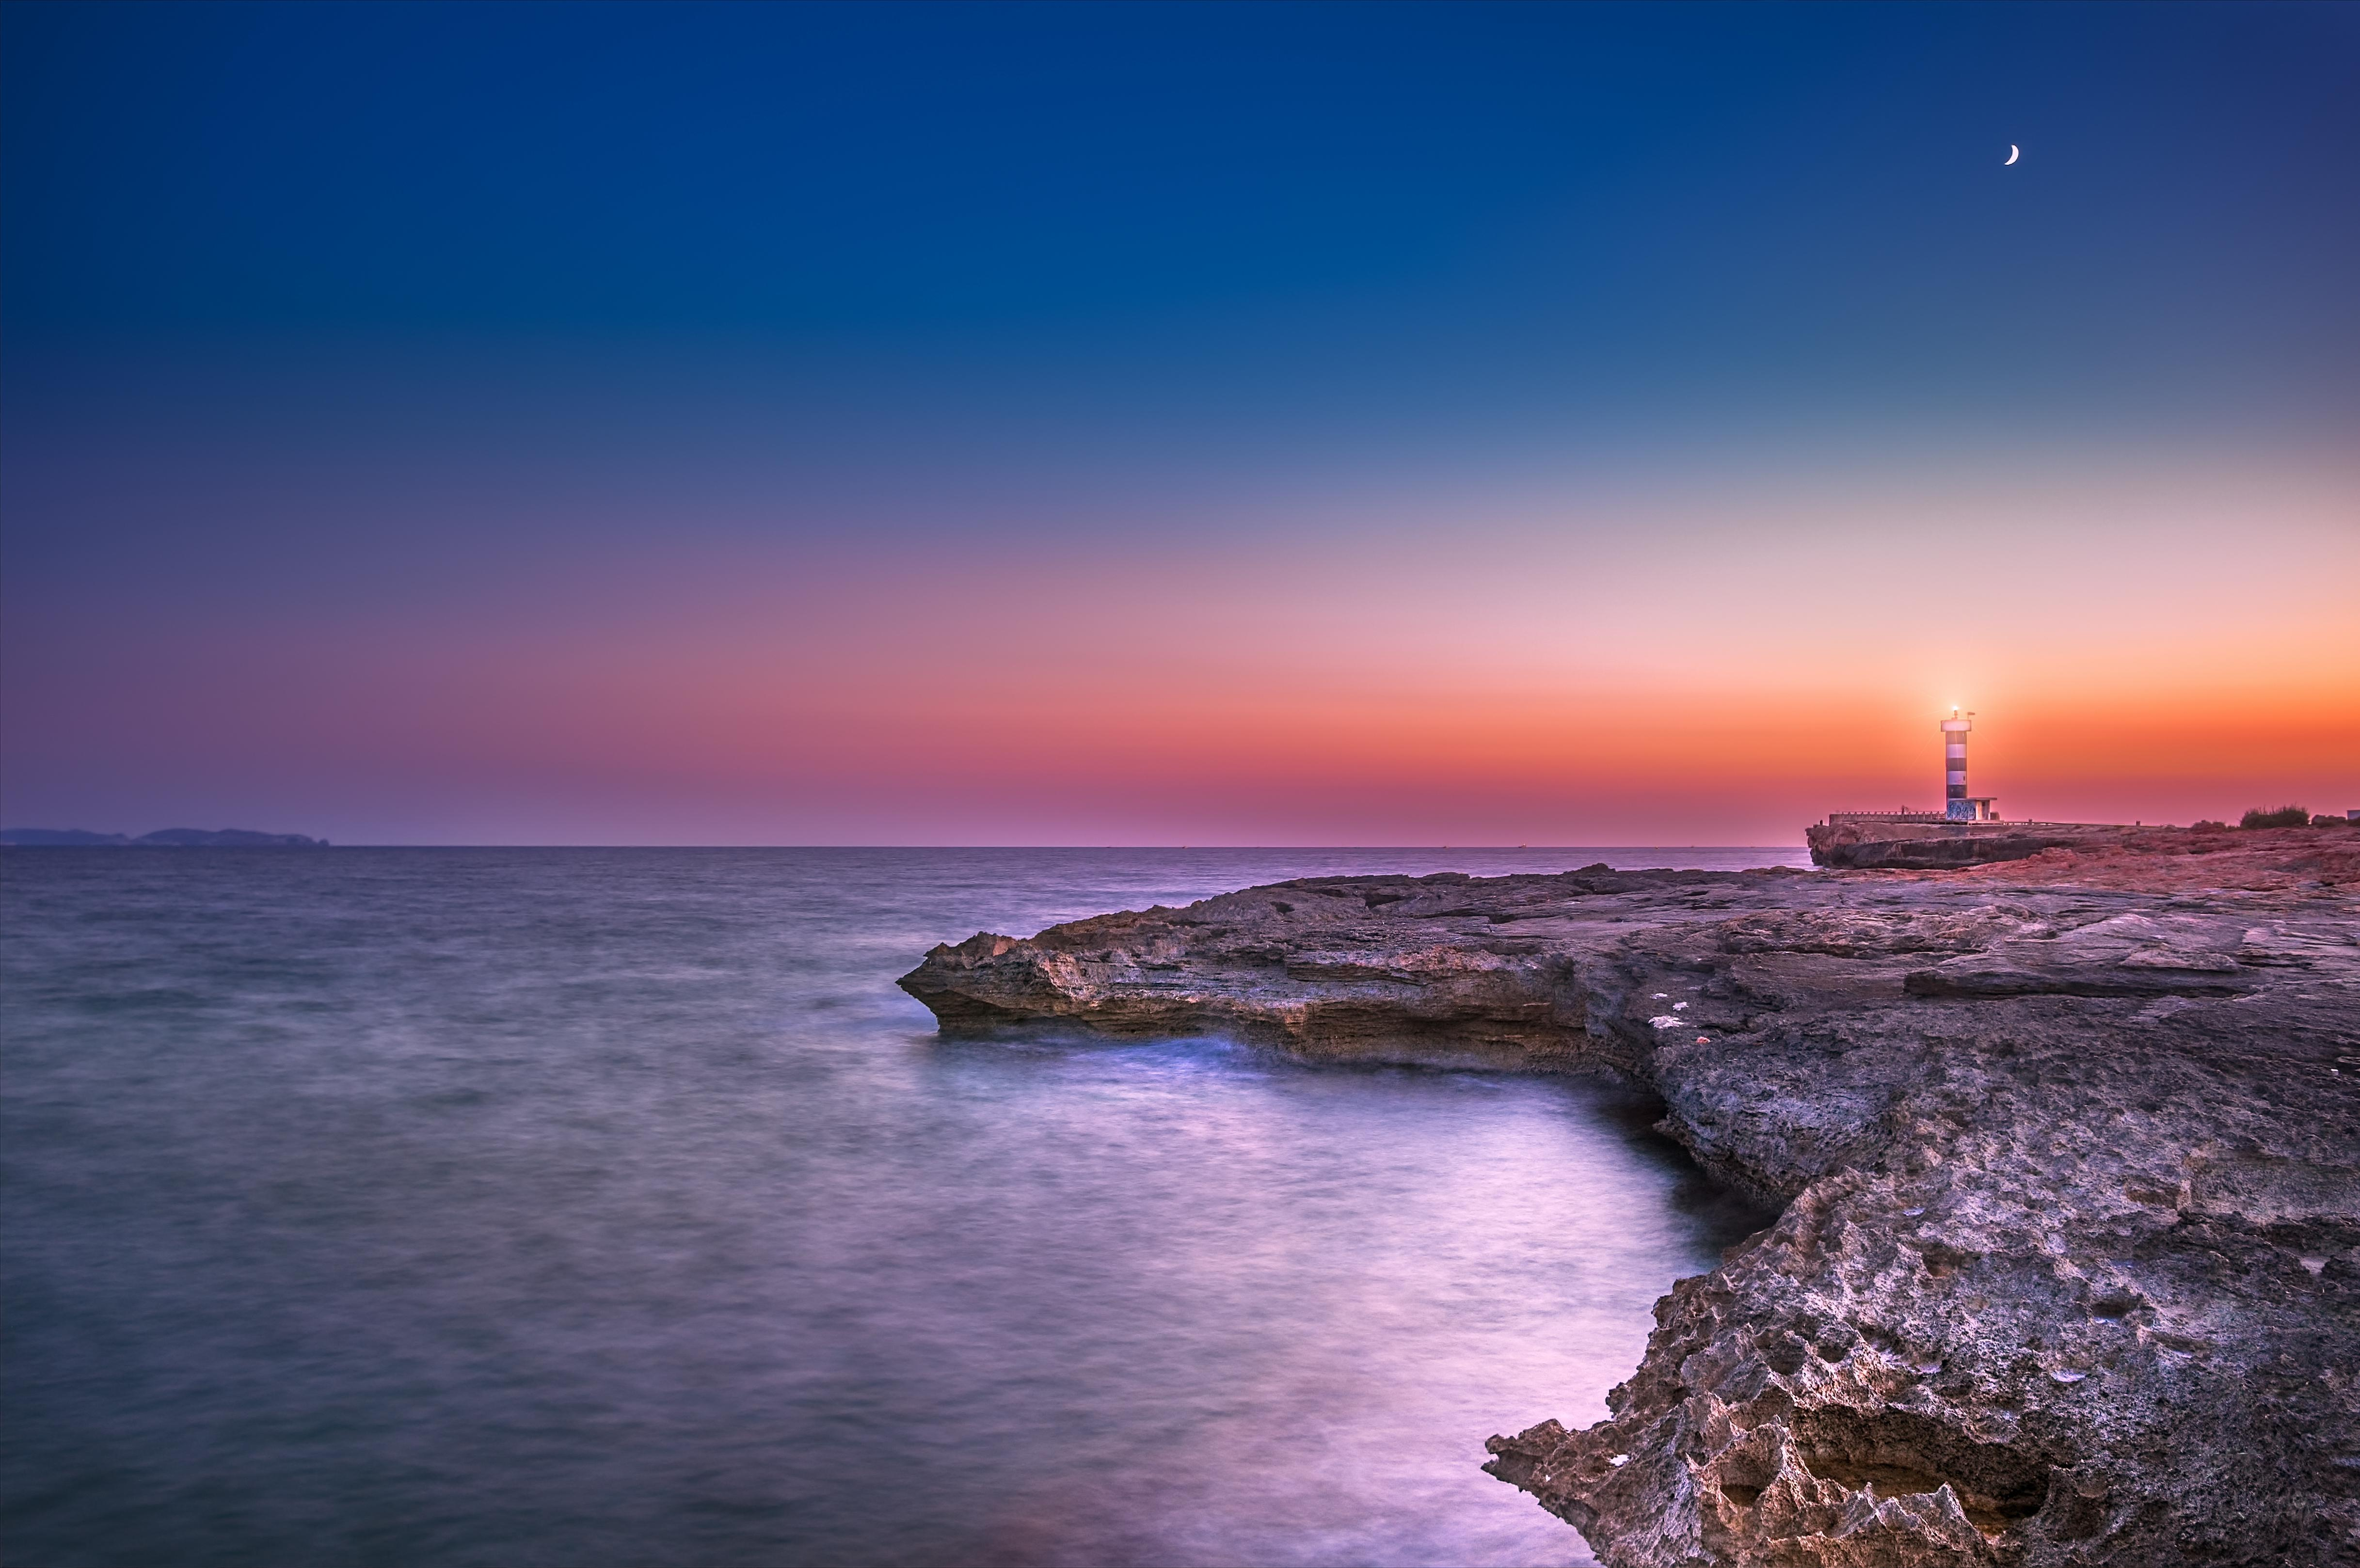

In [1]:
from IPython.display import Image
Image(filename='../images/sunset.jpeg') 

In [2]:
import base64
from anthropic import Anthropic

client = Anthropic()
MODEL_NAME = "claude-3-opus-20240229"

with open("../images/sunset.jpeg", "rb") as image_file:
    binary_data = image_file.read()
    base_64_encoded_data = base64.b64encode(binary_data)
    base64_string = base_64_encoded_data.decode('utf-8')


message_list = [
    {
        "role": 'user',
        "content": [
            {"type": "image", "source": {"type": "base64", "media_type": "image/jpeg", "data": base64_string}},
            {"type": "text", "text": "Write a sonnet based on this image."}
        ]
    }
]

response = client.messages.create(
    model=MODEL_NAME,
    max_tokens=2048,
    messages=message_list
)
print(response.content[0].text)


Upon the rocky shore, a beacon bright,
Its steadfast light a guide through darkest night.
While sun descends in hues of pink and red,
The lighthouse stands, a stalwart figure head.

The waves crash 'gainst the weathered stone below,
A ceaseless rhythm, ancient ebb and flow.
Yet still the tower remains, resolute,
A guardian watching, ever vigilant mute.

The vast expanse of sea and sky surround,
Horizon's line where heaven meets the ground.
This timeless scene, a testament to might,
Of nature's power and the human fight.

The lighthouse, proud amid the fading day,
Eternal symbol, showing safe the way.


## Passing an image through a url

If you only have a URL of the image you can still pass it to Claude with just a few short lines of code.

In [3]:
IMAGE_URL = "https://upload.wikimedia.org/wikipedia/commons/thumb/c/ca/Machu_Picchu%2C_Peru_%282018%29.jpg/2560px-Machu_Picchu%2C_Peru_%282018%29.jpg"
Image(url=IMAGE_URL)


In [4]:
import httpx

IMAGE_DATA = base64.b64encode(httpx.get(IMAGE_URL).content).decode("utf-8")

message_list = [
    {
        "role": 'user',
        "content": [
            {"type": "image", "source": {"type": "base64", "media_type": "image/jpeg", "data": IMAGE_DATA}},
            {"type": "text", "text": "Describe this image in two sentences."}
        ]
    }
]

response = client.messages.create(
    model=MODEL_NAME,
    max_tokens=2048,
    messages=message_list
)
print(response.content[0].text)

The image depicts the ancient Inca city of Machu Picchu, perched high in the Andes Mountains of Peru. The well-preserved stone ruins, including terraces, plazas, and buildings, are set against a stunning backdrop of steep, verdant mountains under a partly cloudy sky.
